In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v1_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v1_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events()
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events()

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [5]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['btagWeight', 'OtherPV', 'CorrT1METJet', 'L1PreFiringWeight', 'Tau', 'SoftActivityJetHT5', 'GenDressedLepton', 'Electron', 'fixedGridRhoFastjetAll', 'run', 'Muon', 'PatMuonVertex', 'DSAMuonVertex', 'RawMET', 'TkMET', 'PatDSAMuonVertex', 'fixedGridRhoFastjetCentralChargedPileUp', 'GenJetAK8', 'event', 'LHEScaleWeight', 'GenMET', 'HLTriggerFinalPath', 'L1', 'L1simulation', 'SubJet', 'SoftActivityJetHT', 'DeepMETResolutionTune', 'LHEPart', 'PuppiMET', 'SoftActivityJetHT10', 'LHEWeight', 'TrigObj', 'GenPart', 'HLTriggerFirstPath', 'CaloMET', 'SoftActivityJetHT2', 'DeepMETResponseTune', 'LHEPdfWeight', 'fixedGridRhoFastjetCentralNeutral', 'SoftActivityJetNjets5', 'SoftActivityJetNjets10', 'LHEReweightingWeight', 'GenVtx', 'DSAMuon', 'IsoTrack', 'ChsMET', 'Photon', 'LowPtElectron', 'Generator', 'BS', 'PV', 'Jet', 'Pileup', 'genWeight', 'RawPuppiMET', 'FatJet', 'SoftActivityJet', 'genTtbarId', 'GenVisTau', 'luminosityBlock', 'HTXS', 'HLT', 'SV', 'SoftActivityJetNjets2', 'Flag', 'boostedTau',

In [47]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].BS.fields)

['x', 'y', 'z', 'ndof', 'chi2', 'ntracks']


In [16]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenMET.fields)

['phi', 'pt']


In [17]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenJet.fields)

['eta', 'mass', 'phi', 'pt', 'partonFlavour', 'hadronFlavour']


In [15]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].genWeight)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [13]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenJetAK8.fields)

['eta', 'mass', 'phi', 'pt', 'partonFlavour', 'hadronFlavour']


In [12]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenDressedLepton.fields)

['eta', 'mass', 'phi', 'pt', 'pdgId', 'hasTauAnc']


In [11]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].Generator.fields)

['binvar', 'scalePDF', 'weight', 'x1', 'x2', 'xpdf1', 'xpdf2', 'id1', 'id2']


In [87]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenVtx.fields)

['x', 'y', 'z', 't0']


In [6]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.fields)

['eta', 'mass', 'phi', 'pt', 'genPartIdxMother', 'pdgId', 'status', 'statusFlags', 'vx', 'vy', 'vz', 'px', 'py', 'pz', 'genPartIdxMotherG', 'distinctParentIdxG', 'childrenIdxG', 'distinctChildrenIdxG', 'distinctChildrenDeepIdxG']


In [93]:
set(ak.flatten(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId))

{-5122,
 -4314,
 -4312,
 -4232,
 -4224,
 -4214,
 -4212,
 -4132,
 -4122,
 -4114,
 -4112,
 -523,
 -521,
 -513,
 -511,
 -433,
 -431,
 -423,
 -421,
 -415,
 -413,
 -411,
 -323,
 -213,
 -211,
 -16,
 -15,
 -14,
 -13,
 -12,
 -11,
 -5,
 -4,
 -3,
 -2,
 -1,
 1,
 2,
 3,
 4,
 5,
 11,
 12,
 13,
 14,
 15,
 16,
 21,
 22,
 32,
 35,
 111,
 130,
 211,
 221,
 223,
 311,
 323,
 331,
 411,
 413,
 421,
 423,
 431,
 433,
 441,
 445,
 511,
 513,
 521,
 523,
 555,
 2101,
 2103,
 2203,
 3101,
 3203,
 4101,
 4112,
 4114,
 4122,
 4132,
 4203,
 4212,
 4214,
 4222,
 4224,
 4232,
 4312,
 4322,
 4324,
 4332,
 5122,
 5212,
 5224}

In [94]:
for id in set(ak.flatten(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId)):
    print(id, set(ak.num(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId == id])))

1 {0, 1, 2, 3}
2 {0, 1, 2, 3, 4, 5}
3 {0, 1, 2, 3}
4 {0, 1, 2, 3, 4, 5, 6}
-511 {0, 1}
513 {0, 1}
5 {0, 1}
5122 {0, 1}
521 {0, 1}
4101 {0, 2}
11 {1, 2, 3, 4, 5, 6, 7, 8, 9}
12 {0, 1, 2}
13 {1, 2, 3, 4, 5}
14 {0, 1, 2}
15 {0, 1}
16 {0, 1, 2}
523 {0, 1}
4114 {0, 1}
511 {0, 1}
4112 {0, 1}
21 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}
22 {0, 1, 2, 3, 4, 5, 6, 7}
4122 {0, 1}
3101 {0, 1}
32 {2}
35 {2}
4132 {0, 1}
555 {0, 6}
2101 {0, 1}
2103 {0, 1}
-433 {0, 1, 2}
-431 {0, 1, 2, 3}
-423 {0, 1, 2, 3}
-421 {0, 1, 2, 3, 4, 5}
5212 {0, 1}
-415 {0, 1}
-413 {0, 1, 2}
-411 {0, 1, 2, 3}
5224 {0, 1}
4203 {0, 2}
111 {0, 1, 2, 3}
4212 {0, 1}
4214 {0, 1}
4222 {0, 1}
4224 {0, 1}
130 {0, 1}
3203 {0, 1}
4232 {0, 1}
2203 {0, 1, 2}
-323 {0, 1}
211 {0, 1, 2}
4312 {0, 1}
221 {0, 1}
223 {0, 1}
4322 {0, 1}
4324 {0, 1}
4332 {0, 1}
-4314 {0, 1}
-4312 {0, 1}
-213 {0, 1}
-211 {0, 1}
-4112 {0, 1}
311 {0, 1}
323 {0, 1}
331 {0, 1}
-4232 {0, 1}
-4224 {0, 1}
-4214 {0, 1}
-4212 {0, 1}
411 {0, 1, 2, 3, 4}
413 {0, 1, 2}
421 {0, 1

In [30]:
for id in set(ak.flatten(events_4mu["4mu_500GeV_5GeV_0p08mm"].GenPart.pdgId)):
    print(id, set(ak.num(events_4mu["4mu_500GeV_5GeV_0p08mm"].GenPart.pdgId[events_4mu["4mu_500GeV_5GeV_0p08mm"].pdgId == id])))

1 {0, 1, 2, 3}
2 {0, 1, 2, 3, 4}
3 {0, 1, 2, 3}
4 {0, 1, 2, 3, 4, 5, 6}
5 {0, 1, 2, 3}
5122 {0, 1}
4103 {0, 2}
513 {0, 1}
521 {0, 1}
-511 {0, 1, 2}
11 {0, 1, 2, 3, 4, 5, 6}
12 {0, 1, 2}
13 {2, 3, 4, 5, 6, 7}
14 {0, 1, 2}
15 {0, 1}
16 {0, 1}
523 {0, 1}
4114 {0, 1}
531 {0, 1}
511 {0, 1}
21 {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 14, 18}
22 {0, 1, 2, 3, 4, 5, 6, 7}
533 {0, 1}
4112 {0, 1}
4122 {0, 1}
32 {2}
35 {2}
4132 {0, 1}
2101 {0, 1}
2103 {0, 1}
-433 {0, 1, 2}
-431 {0, 1, 2}
-425 {0, 1}
-423 {0, 1, 2, 3}
-421 {0, 1, 2, 3, 4, 5}
5212 {0, 1}
5214 {0, 1}
-413 {0, 1, 2}
-411 {0, 1, 2, 3}
5224 {0, 1}
4201 {0, 2}
4203 {0, 2}
111 {0, 1, 2, 3, 4}
113 {0, 1}
4212 {0, 1}
4214 {0, 1}
4222 {0, 1}
4224 {0, 1}
3203 {0, 1}
4232 {0, 1}
2203 {0, 1}
-323 {0, 1}
-311 {0, 1}
4301 {0, 2}
211 {0, 1, 2}
4312 {0, 1}
4314 {0, 1}
221 {0, 1}
223 {0, 1}
4322 {0, 1}
4324 {0, 1}
3303 {0, 1}
-211 {0, 1}
-4112 {0, 1}
-5314 {0, 1}
321 {0, 1}
323 {0, 1}
-4232 {0, 1}
-4224 {0, 1}
-4222 {0, 1}
-4214 {0, 1}
-4212 {0, 1}
411 {0, 1

In [95]:
for id in [32, 35]:
    print(id, set(ak.num(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId == id])))
    print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pt[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId == id][:,0], 
          events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pt[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId == id][:,1])
    

32 {2}
[120, 244, 197, 243, 126, 207, 238, 242, ... 162, 147, 210, 254, 234, 244, 136, 246] [131, 207, 242, 251, 170, 268, 237, 248, ... 132, 353, 202, 244, 249, 250, 200, 232]
35 {2}
[0, 0, 1.42e-14, 0, 0, 0, 2.84e-14, ... 7.11e-15, 2.93e-14, 0, 2.84e-14, 0, 2.93e-14] [12.8, 104, 83.5, 11.7, 109, 60.9, 19.6, ... 211, 9.97, 26.3, 19.8, 6.23, 67.5, 23.8]


In [96]:
for id in [35]:
    print(id, set(ak.num(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId == id])))
    print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.status[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId == id][:,0], 
          events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.status[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId == id][:,1])
    

35 {2}
[22, 22, 22, 22, 22, 22, 22, 22, 22, 22, ... 22, 22, 22, 22, 22, 22, 22, 22, 22, 22] [62, 62, 62, 62, 62, 62, 62, 62, 62, 62, ... 62, 62, 62, 62, 62, 62, 62, 62, 62, 62]


In [97]:
for id in [35]:
    print(id, set(ak.num(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId == id])))
    print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.genPartIdxMother[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId == id][:,0], 
          events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.genPartIdxMother[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId == id][:,1])
    

35 {2}
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [99]:
for id in [35]:
    print(id, set(ak.num(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId == id])))
    print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.childrenIdxG[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId == id][:,0], 
          events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.childrenIdxG[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId == id][:,1])
    

35 {2}
[[3], [24], [51], [82], [106], ... [21255], [21289], [21318], [21340], [21358]] [[4, 5], [25, 26], [52, 53], ... [21320, 21321], [21341, 21342], [21359, 21360]]


In [100]:
for id in [35]:
    print(id, set(ak.num(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId == id])))
    print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.distinctChildrenIdxG[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId == id][:,0], 
          events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.distinctChildrenIdxG[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId == id][:,1])
    

35 {2}
[[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], [], []] [[4, 5], [25, 26], [52, 53], ... [21320, 21321], [21341, 21342], [21359, 21360]]


In [137]:
gen_parts = events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart
print(gen_parts.pdgId)
print(ak.num(gen_parts.distinctChildrenIdxG, axis=-1)==2)
res_sel = (gen_parts.pdgId == 35) & (ak.num(gen_parts.distinctChildrenIdxG,axis=-1)==2)
dp_sel = (gen_parts.pdgId == 32)
res = gen_parts[res_sel]
print(res.distinctChildrenIdxG[:,0][:,0])
for i,idx in enumerate(res.distinctChildrenIdxG[:,0][:,0]):
    print(ak.flatten(gen_parts.pdgId)[idx])
# print(gen_parts[res.distinctChildrenIdxG[:,0][:,0]].pdgId)

[[-4, 4, 35, 35, 32, 32, -13, 13, -11, ... 11, 22, -11, 4, -1, 421, -421, 11, -11]]
[[True, False, False, True, True, False, ... False, False, False, False, False]]
[4, 25, 52, 83, 107, 142, 175, ... 21208, 21235, 21256, 21290, 21320, 21341, 21359]
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
3

In [47]:
import pprint

In [51]:
gen_parts = events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart
flat_gen_parts = ak.flatten(gen_parts)
# & (ak.num(gen_parts.distinctParentIdxG,axis=-1)==1)
# print(gen_parts.pdgId)
# print(gen_parts.distinctParentIdxG)
res_sel = (gen_parts.pdgId == 35) & (ak.num(gen_parts.distinctChildrenIdxG,axis=-1)==2)
dp_sel = (gen_parts.pdgId == 32)
dps = gen_parts[dp_sel]
print(dps.genPartIdxMotherG)
print(dps.distinctChildrenIdxG)
print(ak.flatten(dps.genPartIdxMotherG))
print(ak.flatten(dps.distinctChildrenIdxG))
print(ak.flatten(ak.flatten(dps.distinctChildrenIdxG, axis=-1)))
print(flat_gen_parts[ak.flatten(ak.flatten(dps.distinctChildrenIdxG, axis=-1))].pdgId)
dict_set = {}
for dp,pidx,cidxs in zip(ak.flatten(dps),ak.flatten(dps.genPartIdxMotherG), ak.flatten(dps.distinctChildrenIdxG)):
    # print(dp, dp.pt, pidx, flat_gen_parts.pdgId[pidx], cidxs, flat_gen_parts.pdgId[cidxs])
    if not tuple(np.sort(flat_gen_parts.pdgId[cidxs])) in dict_set:
        dict_set[tuple(np.sort(flat_gen_parts.pdgId[cidxs]))] = 1
    else:
        dict_set[tuple(np.sort(flat_gen_parts.pdgId[cidxs]))] += 1
pprint.pprint(dict_set)

[[3, 3], [24, 24], [51, 51], ... [21318, 21318], [21340, 21340], [21358, 21358]]
[[[6, 7], [8, 9, 10, 12]], ... 21362, 21363, 21365], [21366, 21367, 21370, 21372]]]
[3, 3, 24, 24, 51, 51, 82, 82, ... 21289, 21318, 21318, 21340, 21340, 21358, 21358]
[[6, 7], [8, 9, 10, 12], ... 21362, 21363, 21365], [21366, 21367, 21370, 21372]]
[6, 7, 8, 9, 10, 12, 27, 28, ... 21362, 21363, 21365, 21366, 21367, 21370, 21372]
[-13, 13, -11, 11, -11, 11, -13, 13, -11, ... 11, -13, 13, 13, -13, -11, 11, 11, -11]
{(-13, -13, -13, -13, 13, 13, 13): 1,
 (-13, -13, -13, 13, 13): 1,
 (-13, -13, -13, 13, 13, 13): 39,
 (-13, -13, -13, 13, 13, 13, 13): 1,
 (-13, -13, 13, 13): 232,
 (-13, 13): 523,
 (-11, -11, -11, 11, 11): 46,
 (-11, -11, 11, 11): 396,
 (-11, -11, 11, 11, 11): 53,
 (-11, 11): 302}


In [93]:
gen_parts = events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart
flat_gen_parts = ak.flatten(gen_parts)
res_sel = (gen_parts.pdgId == 35) & (ak.num(gen_parts.distinctChildrenIdxG,axis=-1)==2)
dp_sel = (gen_parts.pdgId == 32)
dps = gen_parts[dp_sel]
print(dps.genPartIdxMotherG)
print(dps.childrenIdxG)
print(ak.flatten(dps.genPartIdxMotherG))
print(flat_gen_parts[ak.flatten(dps.genPartIdxMotherG)].pdgId)
print(flat_gen_parts[ak.flatten(dps.genPartIdxMotherG)].vx)
print(ak.flatten(dps).pdgId)
print(ak.flatten(dps).vx)
print(ak.flatten(dps.childrenIdxG))
print(flat_gen_parts[ak.flatten(dps.childrenIdxG)[:,0]].pdgId)
print(flat_gen_parts[ak.flatten(dps.childrenIdxG)[:,0]].vx)
# print(ak.flatten(ak.flatten(dps.childrenIdxG, axis=-1)))
# print(flat_gen_parts[ak.flatten(ak.flatten(dps.childrenIdxG, axis=-1))].pdgId)
dict_set = {}
for dp,pidx,cidxs in zip(ak.flatten(dps),ak.flatten(dps.genPartIdxMotherG), ak.flatten(dps.childrenIdxG)):
    # print(dp, dp.pt, pidx, flat_gen_parts.pdgId[pidx], cidxs, flat_gen_parts.pdgId[cidxs], flat_gen_parts.vx[cidxs])
    if not tuple(np.sort(flat_gen_parts.pdgId[cidxs])) in dict_set:
        dict_set[tuple(np.sort(flat_gen_parts.pdgId[cidxs]))] = 1
    else:
        dict_set[tuple(np.sort(flat_gen_parts.pdgId[cidxs]))] += 1
pprint.pprint(dict_set)

[[3, 3], [24, 24], [51, 51], ... [21318, 21318], [21340, 21340], [21358, 21358]]
[[[6, 7], [8, 9]], [[27, 28], ... [21345, 21346]], [[21361, 21362], [21366, 21367]]]
[3, 3, 24, 24, 51, 51, 82, 82, ... 21289, 21318, 21318, 21340, 21340, 21358, 21358]
[35, 35, 35, 35, 35, 35, 35, 35, 35, 35, ... 35, 35, 35, 35, 35, 35, 35, 35, 35, 35]
[0.0103, 0.0103, 0.0102, 0.0102, 0.0105, ... 0.011, 0.0106, 0.0106, 0.0104, 0.0104]
[32, 32, 32, 32, 32, 32, 32, 32, 32, 32, ... 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
[0.0103, 0.0103, 0.0102, 0.0102, 0.0105, ... 0.011, 0.0106, 0.0106, 0.0104, 0.0104]
[[6, 7], [8, 9], [27, 28], ... [21345, 21346], [21361, 21362], [21366, 21367]]
[-13, -11, -13, -11, -13, -11, -13, -11, ... -13, -11, -13, -11, -13, -11, -13, -11]
[-0.103, 0.022, -0.295, 0.357, 0.186, ... 0.0551, 0.0727, -0.0403, -0.137, 0.126]
{(-13, 13): 797, (-11, 11): 797}


In [45]:
for id in [35]:
    print(id, set(ak.num(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].pdgId[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].pdgId == id])))
    print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].vx[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].pdgId == id][:,1]**2 + 
          events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].vy[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].pdgId == id][:,1]**2)
    print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].px[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].pdgId == id][:,1]**2 + 
          events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].py[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].pdgId == id][:,1]**2)
    print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].pt[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].pdgId == id][:,1]**2)
    

35 {2}
[0.00183, 0.00183, 0.00177, 0.00189, 0.00187, ... 0.00185, 0.00186, 0.00186, 0.00181]
[164, 1.07e+04, 6.97e+03, 137, 1.18e+04, 3.71e+03, ... 692, 390, 38.9, 4.56e+03, 567]
[164, 1.07e+04, 6.97e+03, 137, 1.18e+04, 3.71e+03, ... 692, 390, 38.9, 4.56e+03, 567]


In [67]:
for id in [35]:
    print(id, set(ak.num(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId == id])))
    resonances = events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].GenPart.pdgId == id][:,1]
    BSs = events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].BS
    print(resonances.vx**2 + resonances.vy**2)
    dxy = (-(resonances.vx - BSs.x) * resonances.py + (resonances.vy - BSs.y) * resonances.px) / resonances.pt
    print(ak.flatten(dxy))

35 {2}
[0.00183, 0.00183, 0.00177, 0.00189, 0.00187, ... 0.00185, 0.00186, 0.00186, 0.00181]
[-0.00049, -0.00023, -0.00032, -0.000586, ... -0.000173, -0.00016, 0.000692]


In [42]:
for id in [32]:
    print(id, set(ak.num(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].pdgId[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].pdgId == id])))
    print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].genPartIdxMother[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].pdgId == id][:,0], 
          events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].genPartIdxMother[events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].pdgId == id][:,1])

32 {2}
[3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, ... 6, 4, 3, 3, 3, 3, 3, 8, 4, 4, 3, 3, 3] [3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, ... 6, 4, 3, 3, 3, 3, 3, 8, 4, 4, 3, 3, 3]


# Basic Information
## We want basic 4 vector or related variables

## mass

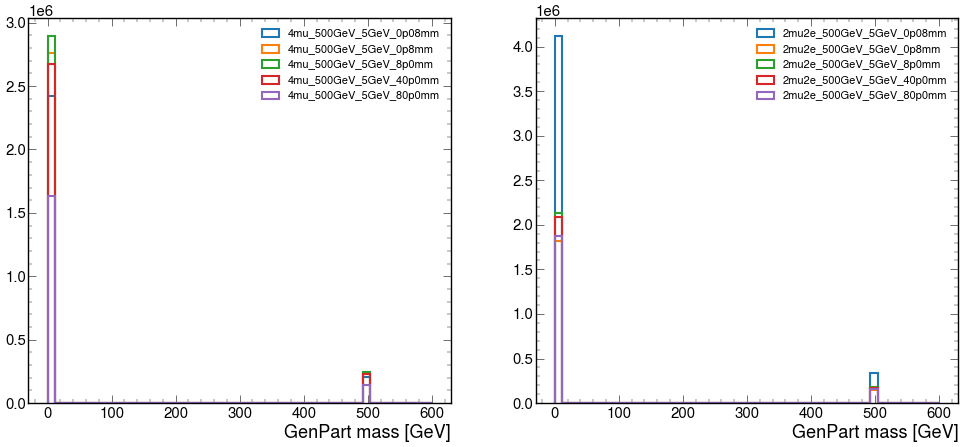

In [7]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    ax[0].hist(ak.flatten(events_4mu[i_4mu].GenPart.mass), range=(0,600), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].GenPart.mass), range=(0,600), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
# ax[0].set_xscale("log")
# ax[1].set_xscale("log")
ax[0].set_xlabel('GenPart mass [GeV]')
ax[1].set_xlabel('GenPart mass [GeV]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
# plt.savefig("../Plots/PF_PHOTON/Basic/mass.png", bbox_inches="tight")

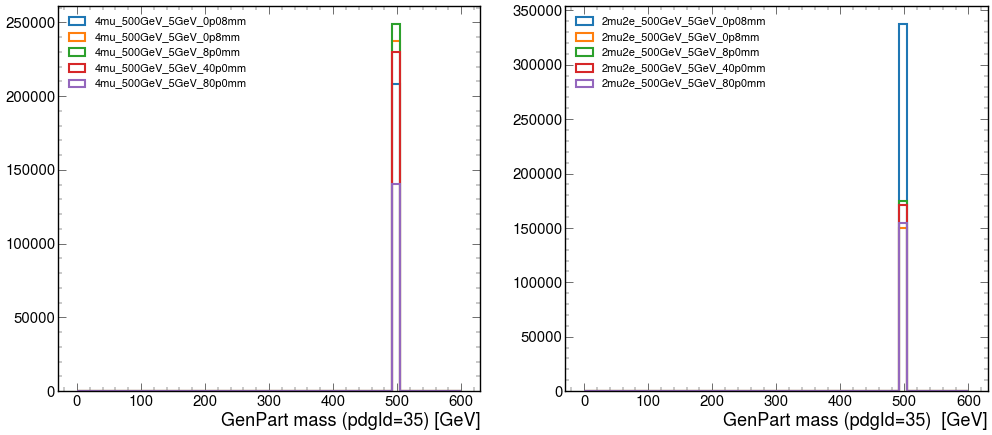

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    ax[0].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35].mass), range=(0,600), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].GenPart[events_2mu2e[i_2mu].GenPart.pdgId == 35].mass), range=(0,600), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
# ax[0].set_xscale("log")
# ax[1].set_xscale("log")
ax[0].set_xlabel('GenPart mass (pdgId=35) [GeV]')
ax[1].set_xlabel('GenPart mass (pdgId=35)  [GeV]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
# plt.savefig("../Plots/PF_PHOTON/Basic/mass.png", bbox_inches="tight")

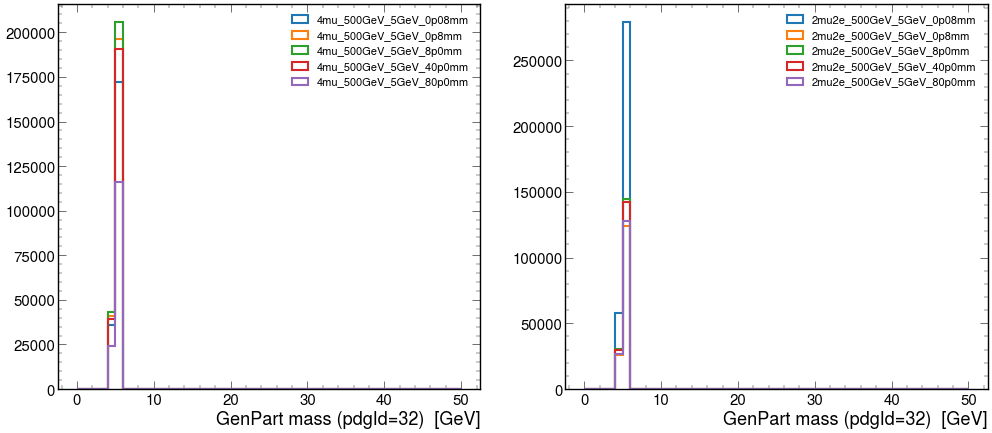

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    ax[0].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 32].mass), range=(0,50), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].GenPart[events_2mu2e[i_2mu].GenPart.pdgId == 32].mass), range=(0,50), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
# ax[0].set_xscale("log")
# ax[1].set_xscale("log")
ax[0].set_xlabel('GenPart mass (pdgId=32)  [GeV]')
ax[1].set_xlabel('GenPart mass (pdgId=32)  [GeV]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
# plt.savefig("../Plots/PF_PHOTON/Basic/mass.png", bbox_inches="tight")

## GenID

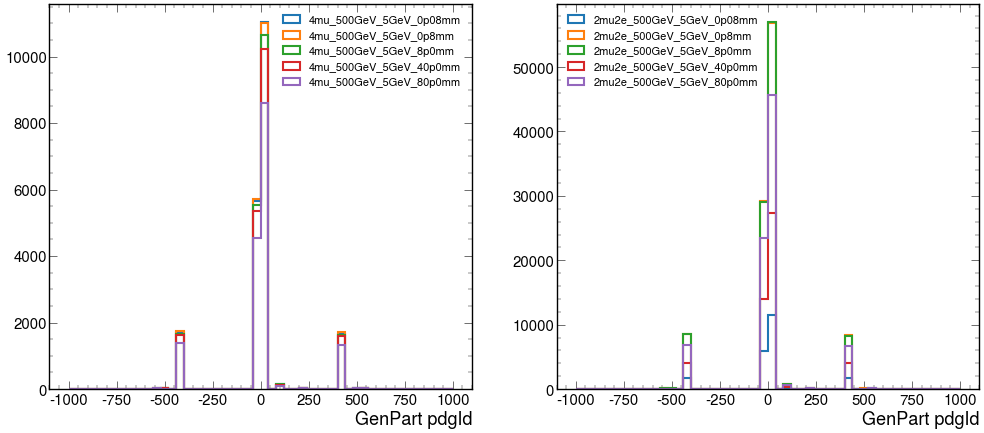

In [70]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    ax[0].hist(ak.flatten(events_4mu[i_4mu].GenPart.pdgId), range=(-1000,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].GenPart.pdgId), range=(-1000,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
# ax[0].set_xscale("log")
# ax[1].set_xscale("log")
ax[0].set_xlabel('GenPart pdgId')
ax[1].set_xlabel('GenPart pdgId')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
# plt.savefig("../Plots/PF_PHOTON/Basic/mass.png", bbox_inches="tight")

## dxy

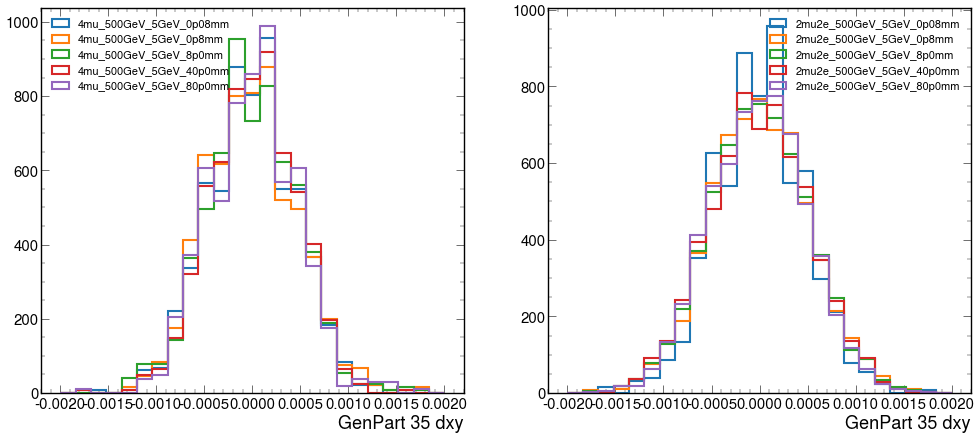

In [85]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    resonances_4mu = events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,1]
    BSs_4mu = events_4mu[i_4mu].BS
    resonances_2mu2e = events_2mu2e[i_2mu].GenPart[events_2mu2e[i_2mu].GenPart.pdgId == 35][:,1]
    BSs_2mu2e = events_2mu2e[i_2mu].BS
    dxy_4mu = (-(resonances_4mu.vx - BSs_4mu.x) * resonances_4mu.py + (resonances_4mu.vy - BSs_4mu.y) * resonances_4mu.px) / resonances_4mu.pt
    dxy_2mu2e = (-(resonances_2mu2e.vx - BSs_2mu2e.x) * resonances_2mu2e.py + (resonances_2mu2e.vy - BSs_2mu2e.y) * resonances_2mu2e.px) / resonances_2mu2e.pt
    ax[0].hist(ak.flatten(dxy_4mu), range=(-.002,.002), alpha=1, bins=25, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1].hist(ak.flatten(dxy_2mu2e), range=(-.002,.002), alpha=1, bins=25, histtype='step', linewidth=3, label=i_2mu, density = True)
# ax[0].set_xscale("log")
# ax[1].set_xscale("log")
ax[0].set_xlabel('GenPart 35 dxy')
ax[1].set_xlabel('GenPart 35 dxy')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
# plt.savefig("../Plots/PF_PHOTON/Basic/mass.png", bbox_inches="tight")

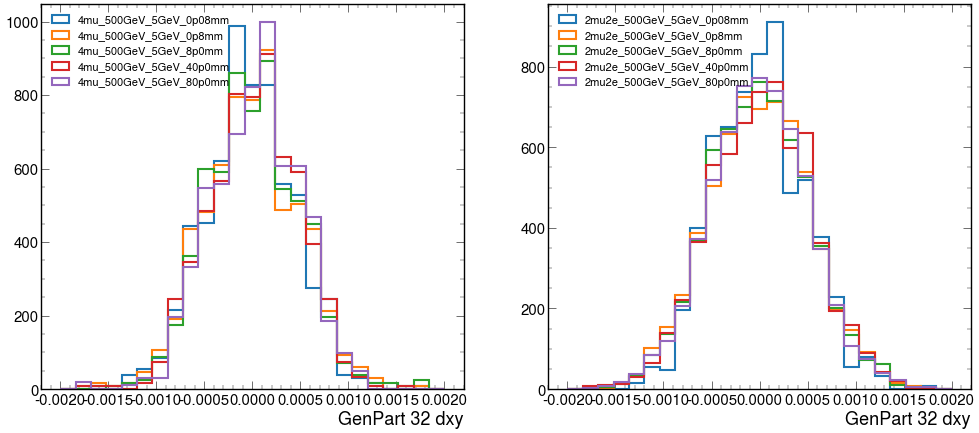

In [86]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    resonances_4mu = events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 32][:,1]
    BSs_4mu = events_4mu[i_4mu].BS
    resonances_2mu2e = events_2mu2e[i_2mu].GenPart[events_2mu2e[i_2mu].GenPart.pdgId == 32][:,1]
    BSs_2mu2e = events_2mu2e[i_2mu].BS
    dxy_4mu = (-(resonances_4mu.vx - BSs_4mu.x) * resonances_4mu.py + (resonances_4mu.vy - BSs_4mu.y) * resonances_4mu.px) / resonances_4mu.pt
    dxy_2mu2e = (-(resonances_2mu2e.vx - BSs_2mu2e.x) * resonances_2mu2e.py + (resonances_2mu2e.vy - BSs_2mu2e.y) * resonances_2mu2e.px) / resonances_2mu2e.pt
    ax[0].hist(ak.flatten(dxy_4mu), range=(-.002,.002), alpha=1, bins=25, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1].hist(ak.flatten(dxy_2mu2e), range=(-.002,.002), alpha=1, bins=25, histtype='step', linewidth=3, label=i_2mu, density = True)
# ax[0].set_xscale("log")
# ax[1].set_xscale("log")
ax[0].set_xlabel('GenPart 32 dxy')
ax[1].set_xlabel('GenPart 32 dxy')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
# plt.savefig("../Plots/PF_PHOTON/Basic/mass.png", bbox_inches="tight")

## DP deep dive

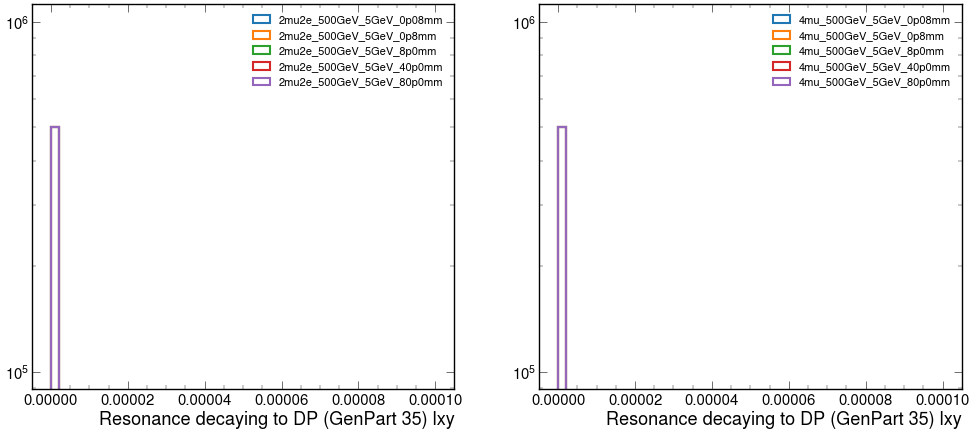

In [89]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    gen_parts = events_2mu2e[i_2mu].GenPart
    flat_gen_parts = ak.flatten(gen_parts)
    dps = gen_parts[(gen_parts.pdgId == 32)]
    res_dps = flat_gen_parts[ak.flatten(dps.genPartIdxMotherG)]
    lep_dps = flat_gen_parts[ak.flatten(dps.childrenIdxG)[:,0]]
    lep_dps = ak.flatten(dps)
    muon_sel = (abs(lep_dps.pdgId)==32)
    lxy = ((res_dps.vx-lep_dps.vx)**2 + (res_dps.vy-lep_dps.vy)**2)**0.5
    ax[0].hist(lxy[muon_sel], range=(0,.0001), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu, density=True)
    
    gen_parts = events_4mu[i_4mu].GenPart
    flat_gen_parts = ak.flatten(gen_parts)
    dps = gen_parts[(gen_parts.pdgId == 32)]
    res_dps = flat_gen_parts[ak.flatten(dps.genPartIdxMotherG)]
    lep_dps = flat_gen_parts[ak.flatten(dps.childrenIdxG)[:,0]]
    lep_dps = ak.flatten(dps)
    muon_sel = (abs(lep_dps.pdgId)==32)
    lxy = ((res_dps.vx-lep_dps.vx)**2 + (res_dps.vy-lep_dps.vy)**2)**0.5
    ax[1].hist(lxy[muon_sel], range=(0,.0001), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
# ax[0].set_xscale("log")
# ax[1].set_xscale("log")
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xlabel('Resonance decaying to DP (GenPart 35) lxy')
ax[1].set_xlabel('Resonance decaying to DP (GenPart 35) lxy')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
# plt.savefig("../Plots/PF_PHOTON/Basic/mass.png", bbox_inches="tight")

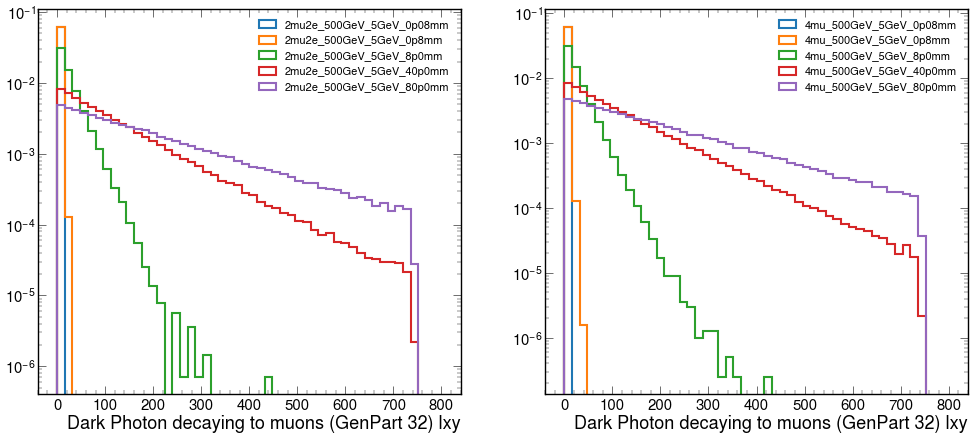

In [14]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    gen_parts = events_2mu2e[i_2mu].GenPart
    flat_gen_parts = ak.flatten(gen_parts)
    dps = gen_parts[(gen_parts.pdgId == 32)]
    res_dps = flat_gen_parts[ak.flatten(dps.genPartIdxMotherG)]
    res_dps = ak.flatten(dps)
    lep_dps = flat_gen_parts[ak.flatten(dps.childrenIdxG)[:,0]]
    muon_sel = (abs(lep_dps.pdgId)==13)
    lxy = ((res_dps.vx-lep_dps.vx)**2 + (res_dps.vy-lep_dps.vy)**2)**0.5
    ax[0].hist(lxy[muon_sel], range=(0,800), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu, density=True)
    
    gen_parts = events_4mu[i_4mu].GenPart
    flat_gen_parts = ak.flatten(gen_parts)
    dps = gen_parts[(gen_parts.pdgId == 32)]
    res_dps = flat_gen_parts[ak.flatten(dps.genPartIdxMotherG)]
    res_dps = ak.flatten(dps)
    lep_dps = flat_gen_parts[ak.flatten(dps.childrenIdxG)[:,0]]
    muon_sel = (abs(lep_dps.pdgId)==13)
    lxy = ((res_dps.vx-lep_dps.vx)**2 + (res_dps.vy-lep_dps.vy)**2)**0.5
    ax[1].hist(lxy[muon_sel], range=(0,800), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
# ax[0].set_xscale("log")
# ax[1].set_xscale("log")
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xlabel('Dark Photon decaying to muons (GenPart 32) lxy')
ax[1].set_xlabel('Dark Photon decaying to muons (GenPart 32) lxy')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
# plt.savefig("../Plots/PF_PHOTON/Basic/mass.png", bbox_inches="tight")

FitParams(loc=1.8261205880776288e-08, scale=0.23942886296308075)
FitParams(loc=2.513831332429106e-06, scale=2.397863984249387)
FitParams(loc=0.00022302207704694155, scale=24.271323257277118)
FitParams(loc=0.0013348202325973446, scale=114.04962093235648)
FitParams(loc=0.0018709864465709103, scale=187.6983151820354)


/tmp/ipykernel_7600/1361320167.py:42: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(bottom=0)


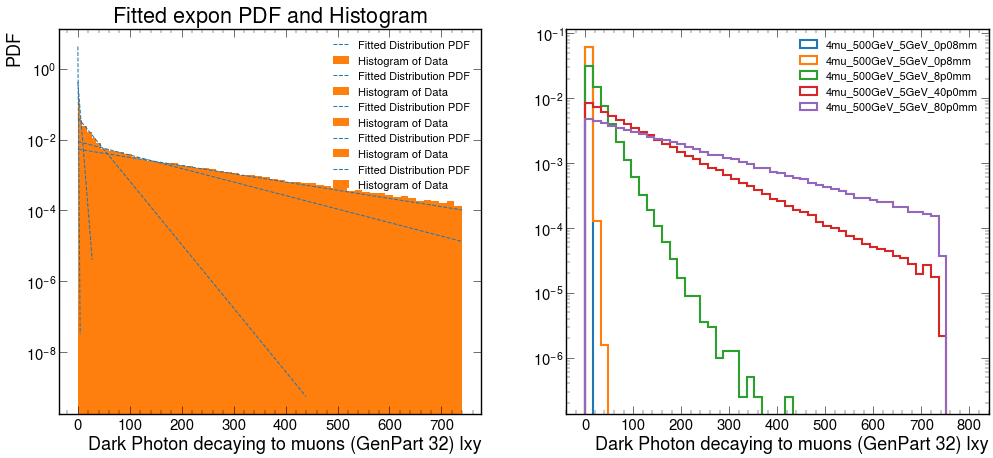

In [41]:
import numpy as np
from scipy import stats
from scipy.stats import expon
from scipy.optimize import differential_evolution
rng = np.random.default_rng()
def optimizer(fun, bounds, *, integrality=True):
    return differential_evolution(fun, bounds, strategy='best2bin',seed=rng)

plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    gen_parts = events_2mu2e[i_2mu].GenPart
    flat_gen_parts = ak.flatten(gen_parts)
    dps = gen_parts[(gen_parts.pdgId == 32)]
    res_dps = flat_gen_parts[ak.flatten(dps.genPartIdxMotherG)]
    res_dps = ak.flatten(dps)
    lep_dps = flat_gen_parts[ak.flatten(dps.childrenIdxG)[:,0]]
    muon_sel = (abs(lep_dps.pdgId)==13)
    lxy = ((res_dps.vx-lep_dps.vx)**2 + (res_dps.vy-lep_dps.vy)**2)**0.5
    dist = expon
    bounds = [(0, 30), (0, 1)]
    # res = stats.fit(dist, lxy[muon_sel], [(0,10),(0,10)])
    res = stats.fit(dist, lxy[muon_sel], [(0,15),(0,500)], optimizer=optimizer)
    print(res.params)
    res.plot(ax=ax[0])
    # ax[0].hist(lxy[muon_sel], range=(0,800), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu, density=True)
    
    gen_parts = events_4mu[i_4mu].GenPart
    flat_gen_parts = ak.flatten(gen_parts)
    dps = gen_parts[(gen_parts.pdgId == 32)]
    res_dps = flat_gen_parts[ak.flatten(dps.genPartIdxMotherG)]
    res_dps = ak.flatten(dps)
    lep_dps = flat_gen_parts[ak.flatten(dps.childrenIdxG)[:,0]]
    muon_sel = (abs(lep_dps.pdgId)==13)
    lxy = ((res_dps.vx-lep_dps.vx)**2 + (res_dps.vy-lep_dps.vy)**2)**0.5
    ax[1].hist(lxy[muon_sel], range=(0,800), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    # break
# ax[0].set_xscale("log")
# ax[1].set_xscale("log")
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_ylim(bottom=0)
ax[0].set_xlabel('Dark Photon decaying to muons (GenPart 32) lxy')
ax[1].set_xlabel('Dark Photon decaying to muons (GenPart 32) lxy')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
# plt.savefig("../Plots/PF_PHOTON/Basic/mass.png", bbox_inches="tight")

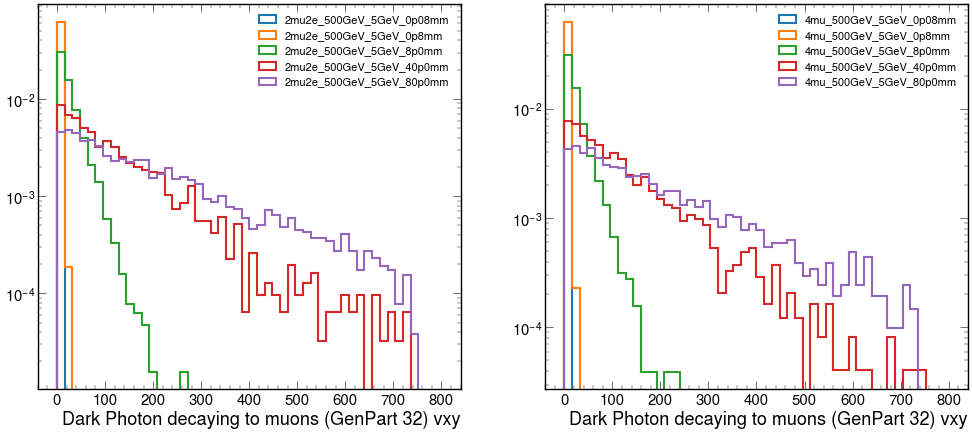

In [94]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    gen_parts = events_2mu2e[i_2mu].GenPart
    flat_gen_parts = ak.flatten(gen_parts)
    dps = gen_parts[(gen_parts.pdgId == 32)]
    res_dps = flat_gen_parts[ak.flatten(dps.genPartIdxMotherG)]
    res_dps = ak.flatten(dps)
    lep_dps = flat_gen_parts[ak.flatten(dps.childrenIdxG)[:,0]]
    muon_sel = (abs(lep_dps.pdgId)==13)
    lxy = ((lep_dps.vx)**2 + (lep_dps.vy)**2)**0.5
    ax[0].hist(lxy[muon_sel], range=(0,800), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu, density=True)
    
    gen_parts = events_4mu[i_4mu].GenPart
    flat_gen_parts = ak.flatten(gen_parts)
    dps = gen_parts[(gen_parts.pdgId == 32)]
    res_dps = flat_gen_parts[ak.flatten(dps.genPartIdxMotherG)]
    res_dps = ak.flatten(dps)
    lep_dps = flat_gen_parts[ak.flatten(dps.childrenIdxG)[:,0]]
    muon_sel = (abs(lep_dps.pdgId)==13)
    lxy = ((lep_dps.vx)**2 + (lep_dps.vy)**2)**0.5
    ax[1].hist(lxy[muon_sel], range=(0,800), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
# ax[0].set_xscale("log")
# ax[1].set_xscale("log")
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xlabel('Dark Photon decaying to muons (GenPart 32) vxy')
ax[1].set_xlabel('Dark Photon decaying to muons (GenPart 32) vxy')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
# plt.savefig("../Plots/PF_PHOTON/Basic/mass.png", bbox_inches="tight")

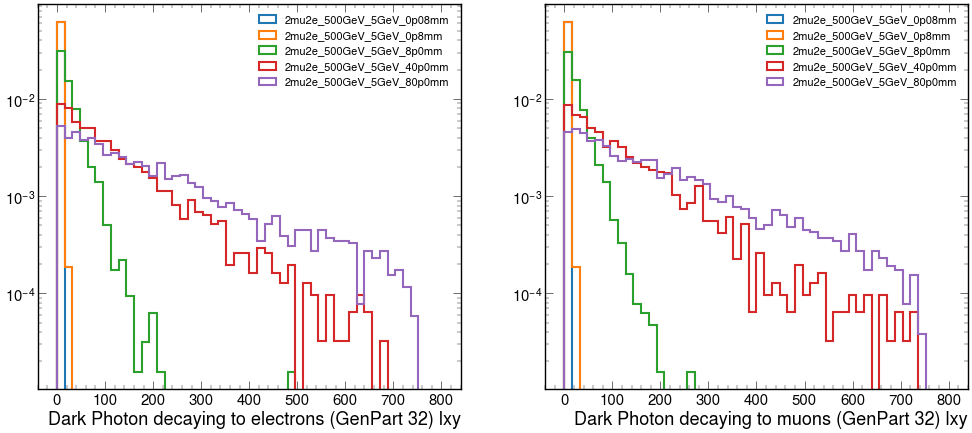

In [95]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    gen_parts = events_2mu2e[i_2mu].GenPart
    flat_gen_parts = ak.flatten(gen_parts)
    dps = gen_parts[(gen_parts.pdgId == 32)]
    res_dps = flat_gen_parts[ak.flatten(dps.genPartIdxMotherG)]
    res_dps = ak.flatten(dps)
    lep_dps = flat_gen_parts[ak.flatten(dps.childrenIdxG)[:,0]]
    muon_sel = (abs(lep_dps.pdgId)==11)
    lxy = ((res_dps.vx-lep_dps.vx)**2 + (res_dps.vy-lep_dps.vy)**2)**0.5
    ax[0].hist(lxy[muon_sel], range=(0,800), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu, density=True)
    
    gen_parts = events_2mu2e[i_2mu].GenPart
    flat_gen_parts = ak.flatten(gen_parts)
    dps = gen_parts[(gen_parts.pdgId == 32)]
    res_dps = flat_gen_parts[ak.flatten(dps.genPartIdxMotherG)]
    res_dps = ak.flatten(dps)
    lep_dps = flat_gen_parts[ak.flatten(dps.childrenIdxG)[:,0]]
    muon_sel = (abs(lep_dps.pdgId)==13)
    lxy = ((res_dps.vx-lep_dps.vx)**2 + (res_dps.vy-lep_dps.vy)**2)**0.5
    ax[1].hist(lxy[muon_sel], range=(0,800), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu, density=True)
# ax[0].set_xscale("log")
# ax[1].set_xscale("log")
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xlabel('Dark Photon decaying to electrons (GenPart 32) lxy')
ax[1].set_xlabel('Dark Photon decaying to muons (GenPart 32) lxy')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
# plt.savefig("../Plots/PF_PHOTON/Basic/mass.png", bbox_inches="tight")

## eta

4mu eta structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [0.711], []]
2mu2e eta structure: [[-0.31, -0.278], [-1.66, -1.72], [-0.0543], ... [0.605, 0.646], [2.34], [1.01]]
4mu eta structure: [[], [], [], [], [], [], [-1.07], ... -1.92], [-1.11, -1.14], [-0.105], [], [], []]
2mu2e eta structure: [[1.41, 1.37], [-0.0929, -0.0132], [-0.41, ... [-1.8, -1.88], [1.53, -0.232, 1.66]]
4mu eta structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [-0.0208], [], [], [], []]
2mu2e eta structure: [[1.3, 1.26], [0.584, 0.511], [-1.74], ... [0.215, 0.248], [-1.23, -1.17], [-2.39]]
4mu eta structure: [[], [-0.837], [-0.524, 0.148], [], [], [], [], ... [], [], [], [], [], [], [], []]
2mu2e eta structure: [[2.48], [0.181], [], [], [], [], ... [1.11, 0.994], [2.27, 2.21], [-0.651], [0.807]]
4mu eta structure: [[], [], [], [], [], [], [], [], ... [], [], [1.65], [-0.764], [-2.04], []]
2mu2e eta structure: [[], [], [], [-1.91, -2.18], ... [-0.0979, -1.21], [], [-0.0954

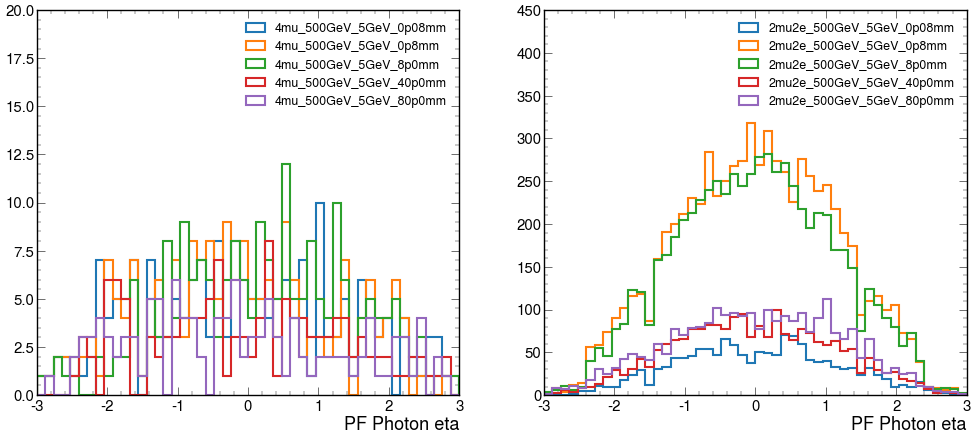

In [7]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("eta", events_4mu[i_4mu].eta, events_2mu2e[i_2mu].eta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-3,3)
ax[1].set_xlim(-3,3)
ax[0].set_ylim(0,20)
ax[1].set_ylim(0,450)
ax[0].set_xlabel('PF Photon eta')
ax[1].set_xlabel('PF Photon eta')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_PHOTON/Basic/eta.png", bbox_inches="tight")

## phi

4mu phi structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [0.606], []]
2mu2e phi structure: [[-1.01, -1.05], [-0.475, -0.47], [-2.42], ... [0.0302, 0.111], [-1.68], [0.229]]
4mu phi structure: [[], [], [], [], [], [], [-0.807], ... -1.79], [0.888, 0.87], [0.0358], [], [], []]
2mu2e phi structure: [[-1.97, -2.01], [-2.88, -2.91], [1.52, ... [-0.764, -0.781], [2.04, -1.86, 1.92]]
4mu phi structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [-2.29], [], [], [], []]
2mu2e phi structure: [[1.48, 1.48], [-1.54, -1.62], [-0.599], ... [-2.88, -2.91], [-2.52, -2.55], [2.2]]
4mu phi structure: [[], [-1.97], [2.5, -2.44], [], [], [], [], ... [], [], [], [], [], [], [], []]
2mu2e phi structure: [[2.61], [2.6], [], [], [], [], ... [-2.6, -2.52], [2.55, 2.5], [-0.226], [-1.51]]
4mu phi structure: [[], [], [], [], [], [], [], [], ... [], [], [2.74], [0.296], [-0.00907], []]
2mu2e phi structure: [[], [], [], [2.16, 1.24], [0.548], ... [], [-2.84, -0.293], [], [1.54

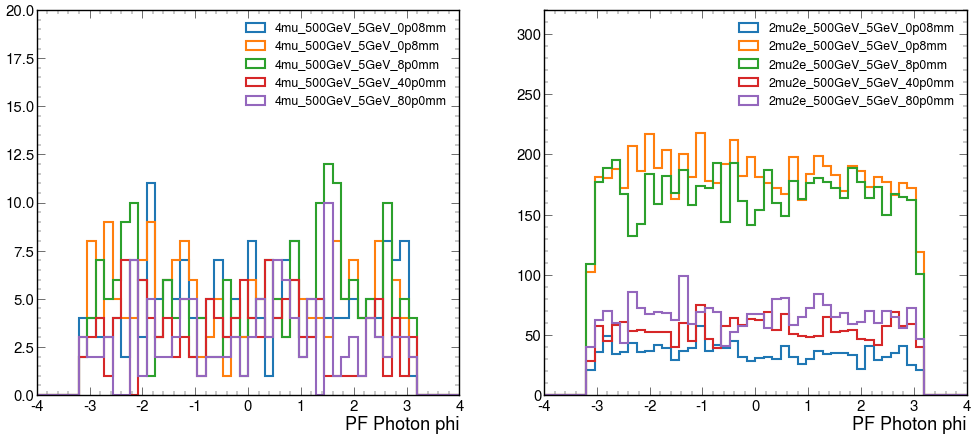

In [14]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("phi", events_4mu[i_4mu].phi, events_2mu2e[i_2mu].phi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-4,4)
ax[1].set_xlim(-4,4)
ax[0].set_ylim(0,20)
ax[1].set_ylim(0,320)
ax[0].set_xlabel('PF Photon phi')
ax[1].set_xlabel('PF Photon phi')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_PHOTON/Basic/phi.png", bbox_inches="tight")

## pt

4mu pt structure: [[], [], [], [], [], [], [], [], [], [], ... 37], [], [], [], [], [], [], [22.5], []]
2mu2e pt structure: [[106, 103], [167, 66.2], [270], [239], ... [208, 28.9], [223, 28.9], [202], [240]]
4mu pt structure: [[], [], [], [], [], [], [15.4], [], ... [21], [60.8, 50.4], [56.2], [], [], []]
2mu2e pt structure: [[149, 113], [180, 19.1], [236, 11.2], ... [449], [203, 25.9], [45, 32.7, 18.1]]
4mu pt structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [16.2], [], [], [], []]
2mu2e pt structure: [[184, 67.9], [227, 15.6], [204], [252], ... [195], [168, 144], [139, 35], [212]]
4mu pt structure: [[], [19.8], [34.3, 13.4], [], [], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e pt structure: [[16.9], [17.6], [], [], [], [], ... [124, 10.3], [81.8, 42.3], [201], [276]]
4mu pt structure: [[], [], [], [], [], [], [], [], [], ... [28.6], [], [], [10.1], [20.1], [21.5], []]
2mu2e pt structure: [[], [], [], [220, 37.5], [144], [303, ... [], [22.5, 21.8], [], [184, 94

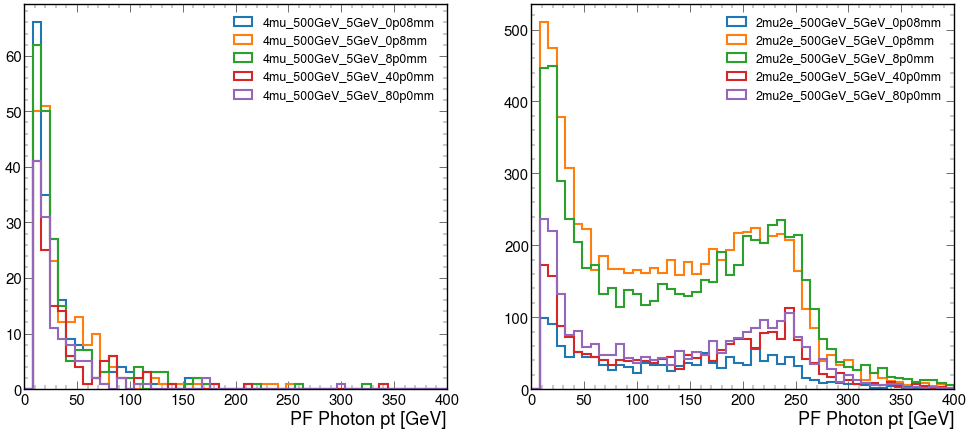

In [15]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt", events_4mu[i_4mu].pt, events_2mu2e[i_2mu].pt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(0,400)
ax[1].set_xlim(0,400)
ax[0].set_xlabel('PF Photon pt [GeV]')
ax[1].set_xlabel('PF Photon pt [GeV]')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_PHOTON/Basic/pt.png", bbox_inches="tight")